In [ ]:
%tensorflow_version 2.x

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models , Sequential
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import numpy as np
from PIL import Image
import random
import os
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# all the arabic signs
CATEGORIES = ['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 
             'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 
             'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 
             'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay'] 

In [ ]:
#training parameters
IMG_SIZE = 64
targetCount = len(CATEGORIES) #the arabic alphabet count : 32
BATCH_SIZE = 5
NB_EPOCHS = 1
path = '/content/gdrive/MyDrive/ArASL'

In [ ]:
#loading data
training=[]

In [ ]:
def createTrainingData():
    ii = 0
    for Class in os.listdir(path):
        Class_Path = os.path.join(path ,  Class)
        for img in os.listdir(Class_Path):
            #image
            img_array = cv2.cvtColor(cv2.imread(os.path.join(Class_Path , img)), cv2.COLOR_BGR2GRAY)
            ii = ii + 1
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            print(Class,img , img_array.shape)
            #label
            training.append([new_array , CATEGORIES.index(Class)])
    print('Loading train_DATA is finshed... size : ', ii)
    return training

In [ ]:
createTrainingData()

In [ ]:
#Randomize data
random.shuffle(training)
print('Data is shuffeled...')

Data is shuffeled...


In [ ]:
#Seprate features and labels
features = []
labels = []

for f , l in training:
    features.append(f)
    labels.append(l)

##Normalize the data to be float type between 0 and 1 : 

In [ ]:
input = np.array(features).reshape(-1 , IMG_SIZE, IMG_SIZE , 1)
output = np.array(labels)

#convert to flaot
input = input.astype('float32')
#converting value from [0,255] to [0,1]
input /= 255.0

In [ ]:
input.shape

(50851, 64, 64, 1)

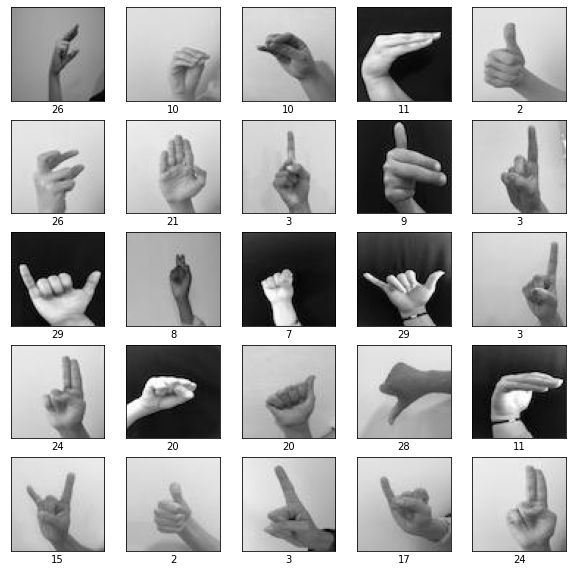

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = cv2.cvtColor(input[i], cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.xlabel(output[i])
    
plt.show()

##convert output shape to categorical

In [ ]:
output = tf.keras.utils.to_categorical(output,targetCount)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(input , output , test_size = 0.2, random_state = 4 )

##model creation 

In [ ]:
def create_model():
  model = Sequential(name='ARABIC_SIGNS')
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE , 1) ) )
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu' ,input_shape=(IMG_SIZE, IMG_SIZE , 1) ) )
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  #classification layers 
  model.add(layers.Flatten())
  model.add(layers.Dense(512/2, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(targetCount, activation='softmax'))
  print(model.summary())
  return model

In [ ]:
my_model = create_model()

Model: "ARABIC_SIGNS"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 256)              

In [ ]:
my_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(40680, 64, 64, 1) (40680, 32)
(10171, 64, 64, 1) (10171, 32)


In [ ]:
history = my_model.fit(X_train , Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCHS)

8136/8136 [==============================] - 542s 66ms/step - loss: 0.9488 - accuracy: 0.7110


In [ ]:
score = my_model.evaluate( X_test , Y_test, verbose = 1 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

318/318 [==============================] - 15s 46ms/step - loss: 0.2573 - accuracy: 0.9249
Test Score:  0.257319837808609
Test accuracy:  0.9248844981193542


##Save the model

In [ ]:
!dir

gdrive	sample_data


In [ ]:
my_model.save('/content/gdrive/MyDrive/saved_model/ARS_REC_model_gray.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/saved_model/ARS_REC_model_gray.h5')
# Check its architecture
new_model.summary()

Model: "ARABIC_SIGNS"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 256)              

#Verrifing the model

In [54]:
predicted = new_model.predict(X_test)

In [55]:
args = []
for i in range(10171):
  args.append(np.argmax(predicted[i]))
len(args)

10171

In [56]:
Labls = np.array(args)

In [57]:
y_args = []
for i in range(10171):
  y_args.append(np.argmax(Y_test[i]))
len(y_args)

10171

In [58]:
Y_la = np.array(y_args)

##generating a confusion matrix

In [59]:
CM = tf.math.confusion_matrix(Y_la , Labls ).numpy()

In [62]:
con_mat_norm = np.around(CM.astype('float') / CM.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = CATEGORIES, 
                     columns = CATEGORIES)

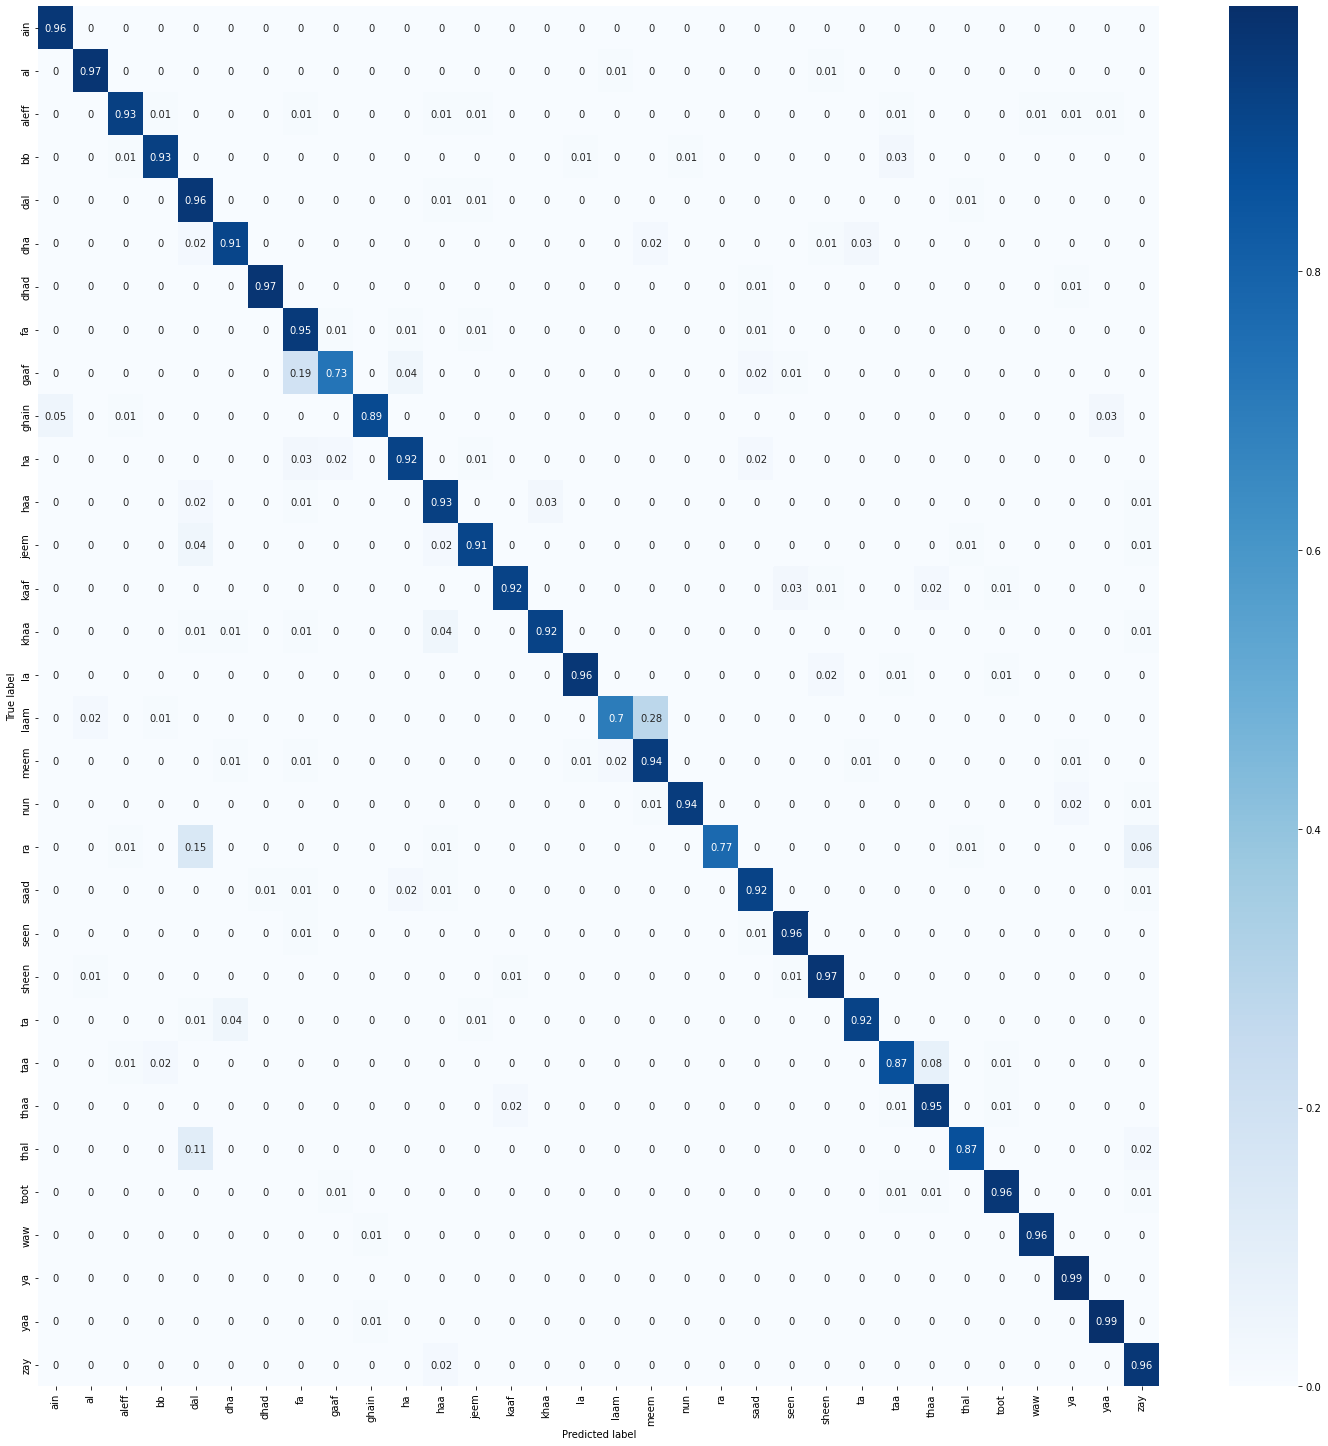

In [63]:
figure = plt.figure(figsize=(20, 20))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()